In [210]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [211]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [212]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [214]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


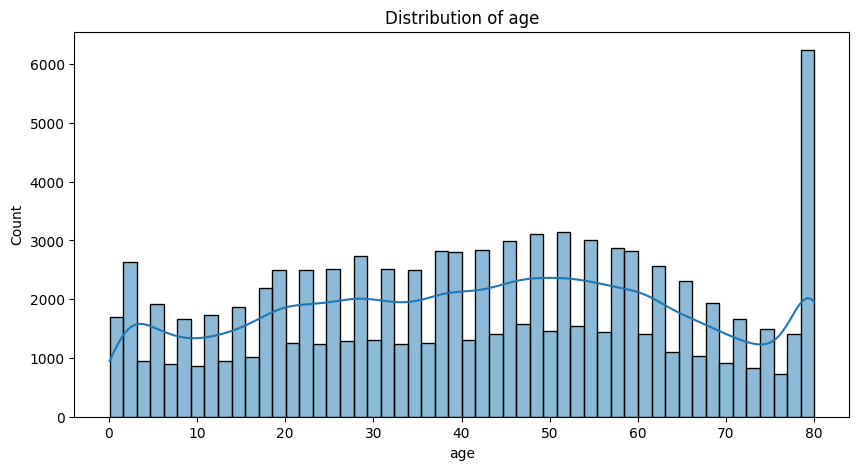

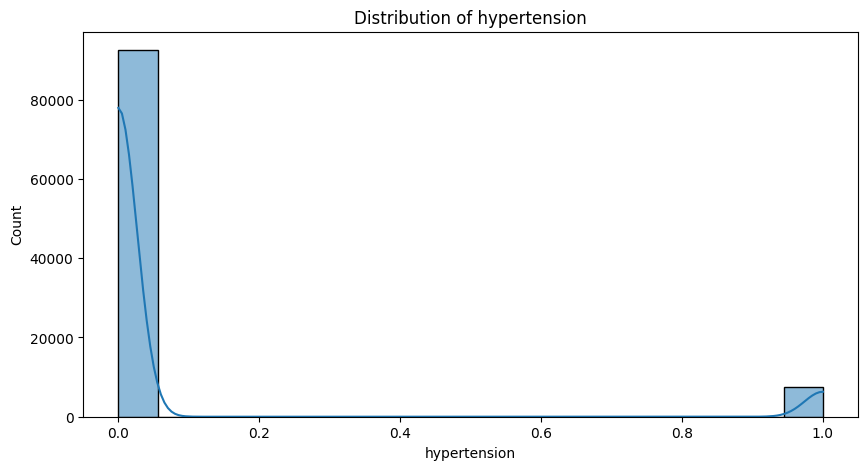

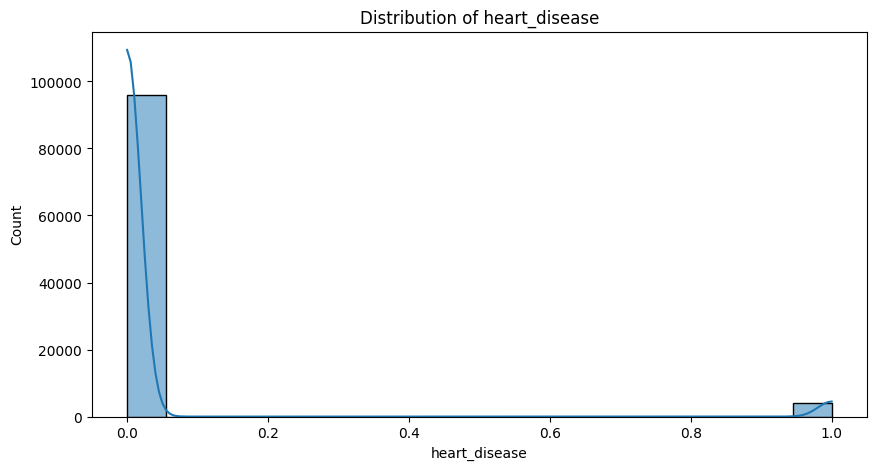

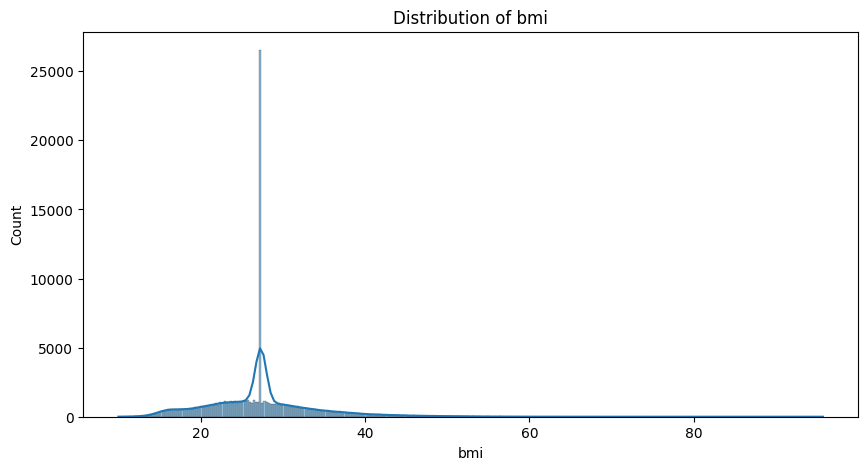

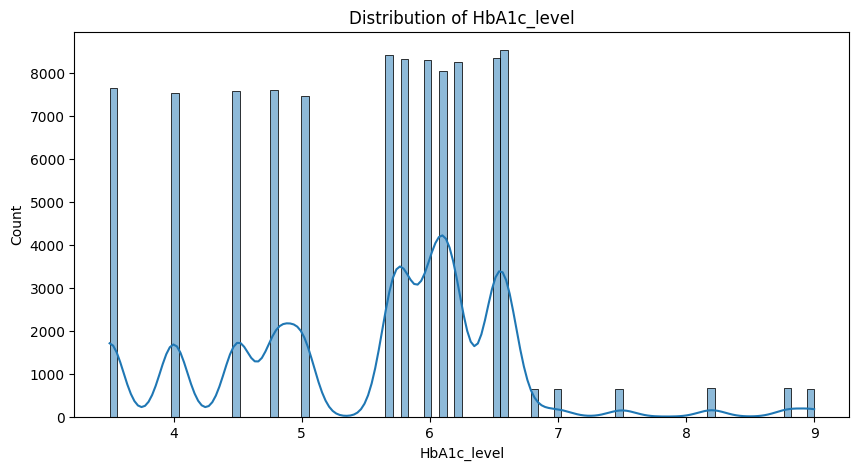

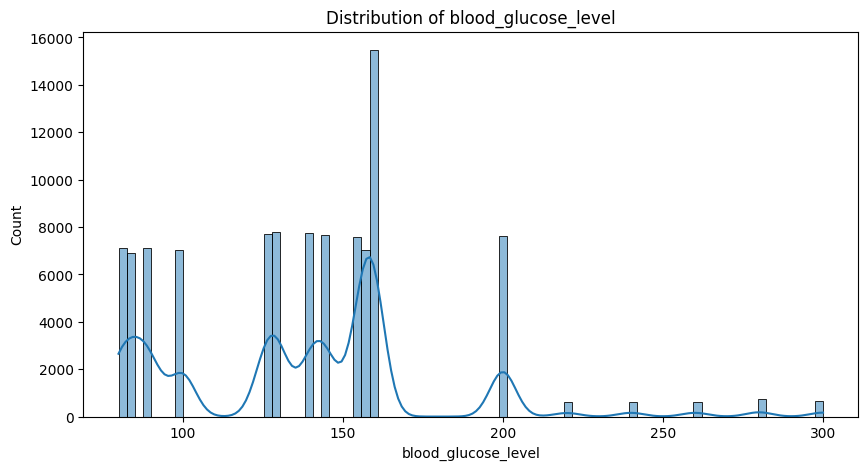

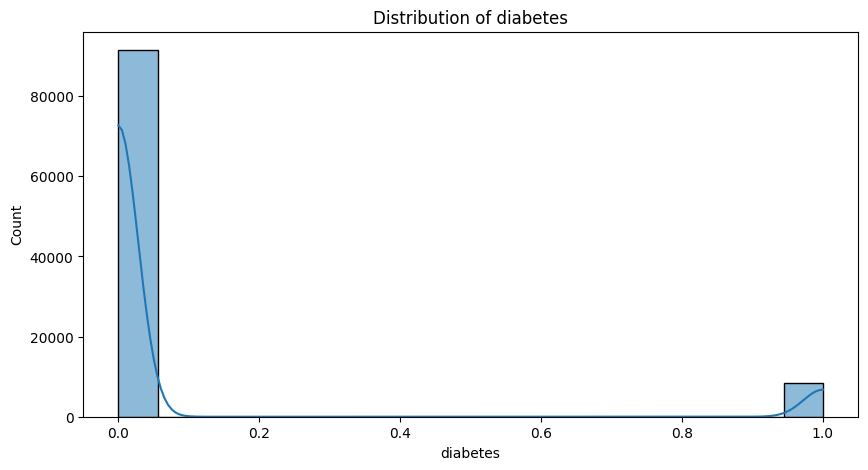

In [215]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [216]:
c = 0

for a in df.columns:
    if df[a].isnull().sum()==0:
        c=c+1
    else:
        print(a,df[a].isnull().sum(),df[a].dtype)
if c == len(df.columns):
    print('Tidak ada missing value')
else:
    print('Ada missing value')

Tidak ada missing value


In [217]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [218]:
row_df = df.shape[0]

for i in df.columns:
    if df[i].isnull().sum()==0:
        continue
    elif df[i].dtype=='int64' or df[i].dtype=='float64':
        if (50/100)*(row_df) > df[i].isnull().sum():
            df.drop(i,axis=1,inplace=True)
        elif df[i].skew() < -0.5 or df[i].skew() > 0.5:
            df.fillna(df[i].median(),inplace=True)
        else:
            df.fillna(df[i].mean(), inplace=True)
    else:
        if df.fillna(df[i].mode()[0], inplace=True) != 'None':
            df.fillna(df[i].mode()[0], inplace=True)
        else:
            df.drop(i,axis=1,inplace=True)

In [219]:
if df.duplicated().sum() == 0:
    print('Tidak ada duplicate')
else:
    print('Ada duplicate')

Ada duplicate


In [220]:
df.drop_duplicates(keep='first', inplace=True)

In [221]:
df.duplicated().sum()

np.int64(0)

In [222]:
categorical_column = [col for col in df.columns if df[col].dtype=='object']
print(categorical_column)
print(len(categorical_column))

['gender', 'smoking_history']
2


In [223]:
for a in categorical_column:
    if a == 'gender' or a =='smoking_history':
        df = pd.get_dummies(df, columns=[a], dtype=int)

In [224]:
df.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Female                    int64
gender_Male                      int64
gender_Other                     int64
smoking_history_No Info          int64
smoking_history_current          int64
smoking_history_ever             int64
smoking_history_former           int64
smoking_history_never            int64
smoking_history_not current      int64
dtype: object

In [225]:
correlation_matrix = df.corr()
feature_and_target = []

for a in df.columns:
    if abs(correlation_matrix.loc[a,'diabetes'])>0.5:
        print(correlation_matrix.loc[a,'diabetes'])
        print(a)
        feature_and_target.append(a)

1.0
diabetes


In [226]:
print(correlation_matrix['diabetes'].sort_values(ascending=False))

diabetes                       1.000000
blood_glucose_level            0.424336
HbA1c_level                    0.406408
age                            0.264927
bmi                            0.214932
hypertension                   0.195710
heart_disease                  0.170711
smoking_history_former         0.095492
gender_Male                    0.037883
smoking_history_never          0.023136
smoking_history_ever           0.021915
smoking_history_not current    0.018921
smoking_history_current        0.017037
gender_Other                  -0.004256
gender_Female                 -0.037763
smoking_history_No Info       -0.112576
Name: diabetes, dtype: float64


In [227]:
print(correlation_matrix)

                                  age  hypertension  heart_disease       bmi  \
age                          1.000000      0.257305       0.238451  0.344797   
hypertension                 0.257305      1.000000       0.119982  0.148111   
heart_disease                0.238451      0.119982       1.000000  0.061376   
bmi                          0.344797      0.148111       0.061376  1.000000   
HbA1c_level                  0.106719      0.081441       0.068140  0.084423   
blood_glucose_level          0.114317      0.084834       0.070832  0.092543   
diabetes                     0.264927      0.195710       0.170711  0.214932   
gender_Female                0.028785     -0.014129      -0.078456  0.023484   
gender_Male                 -0.028580      0.014240       0.078539 -0.023488   
gender_Other                -0.007456     -0.003969      -0.002822  0.000117   
smoking_history_No Info     -0.294166     -0.111535      -0.048194 -0.229352   
smoking_history_current      0.033424   

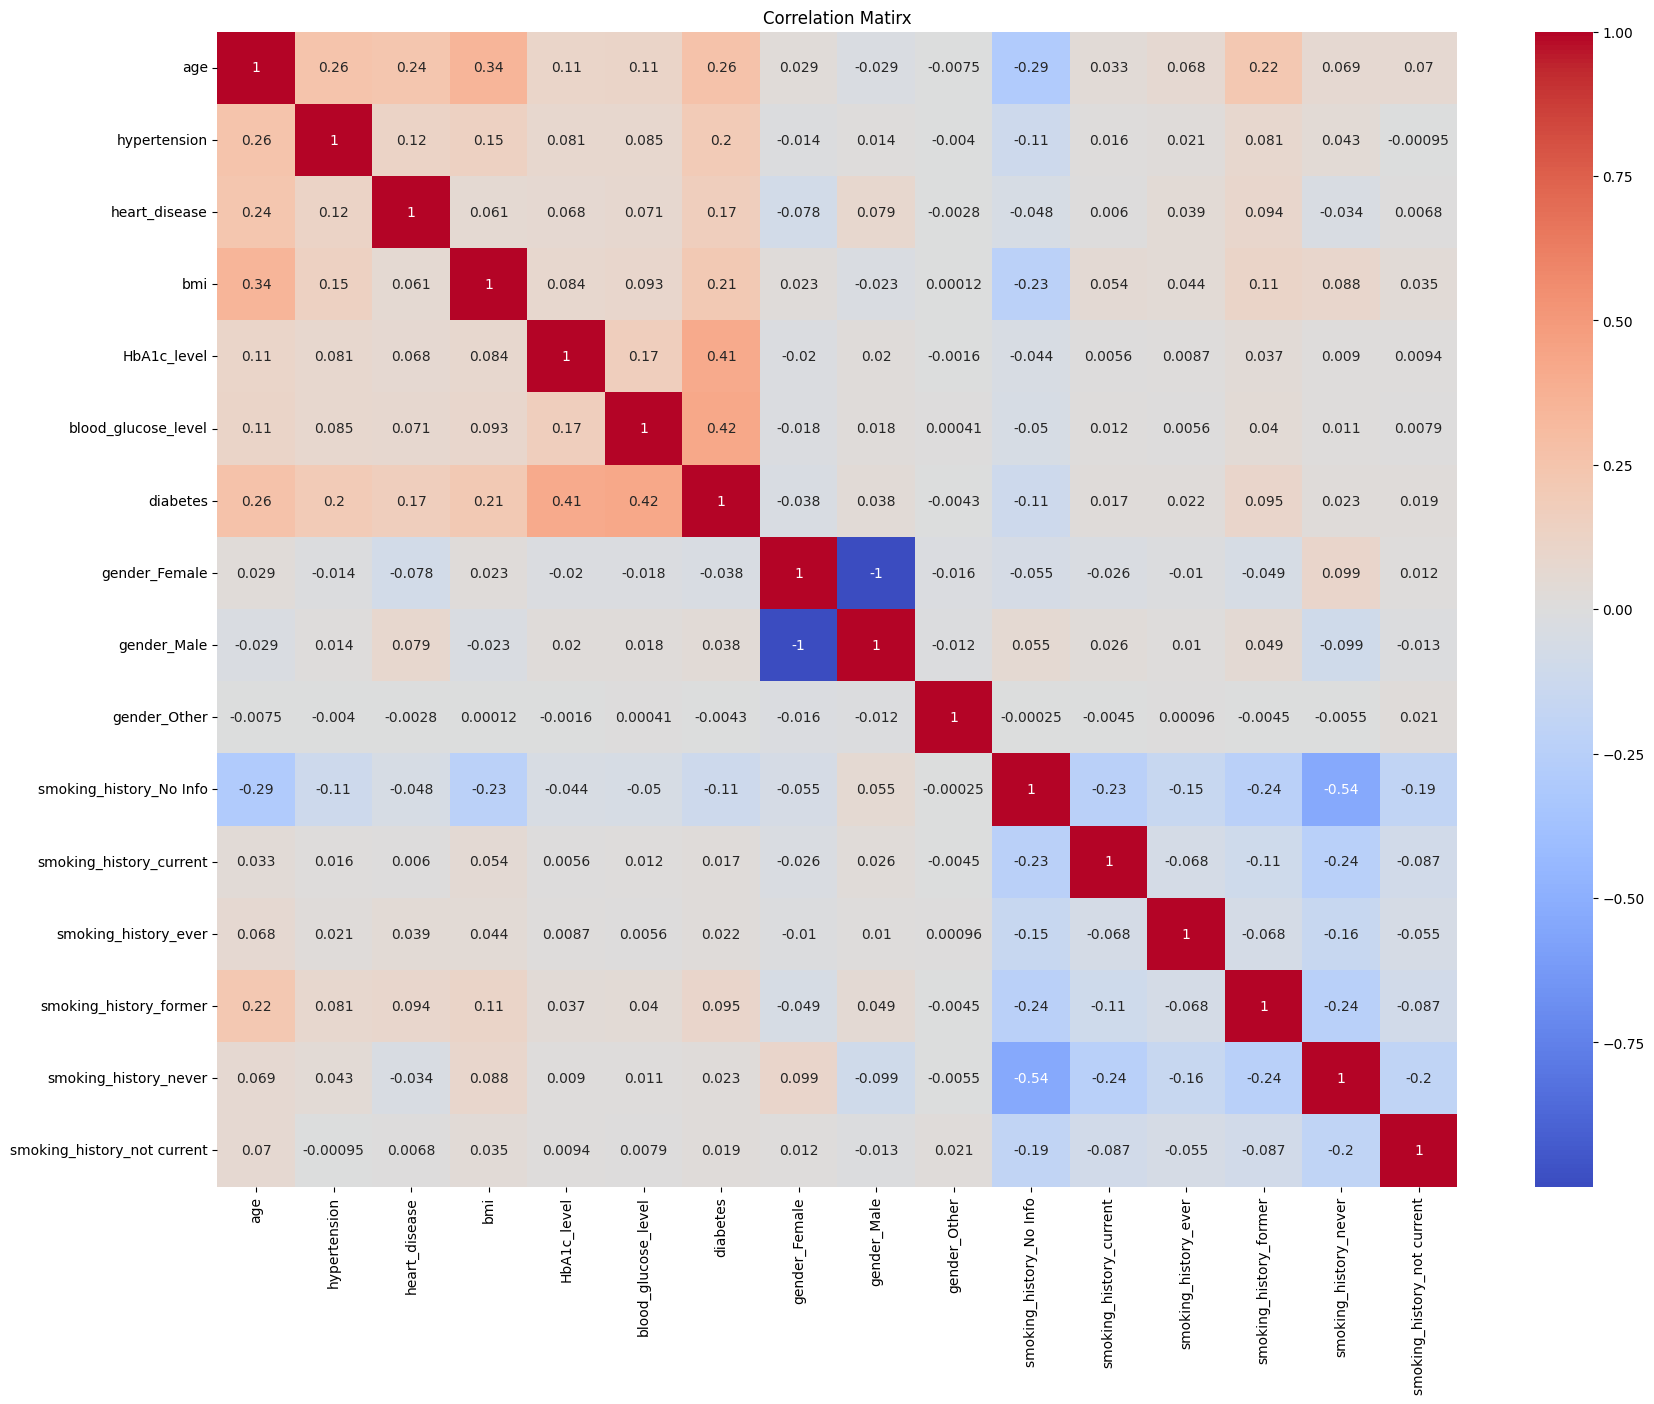

In [228]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matirx')
plt.show()

In [229]:
pairs = []
for b in df.columns:
    if b=='diabetes':
        continue
    for c in df.columns:
        if b==c:
            continue
        if abs(correlation_matrix.loc[b,c])>0.7:
            pairs.append((b,c,correlation_matrix.loc[b,c]))

In [230]:
pairs

[('gender_Female', 'gender_Male', np.float64(-0.9996147112769045)),
 ('gender_Male', 'gender_Female', np.float64(-0.9996147112769045))]

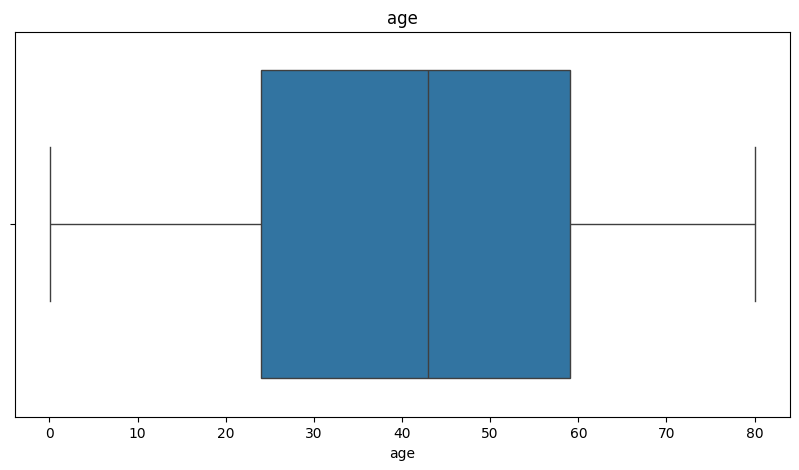

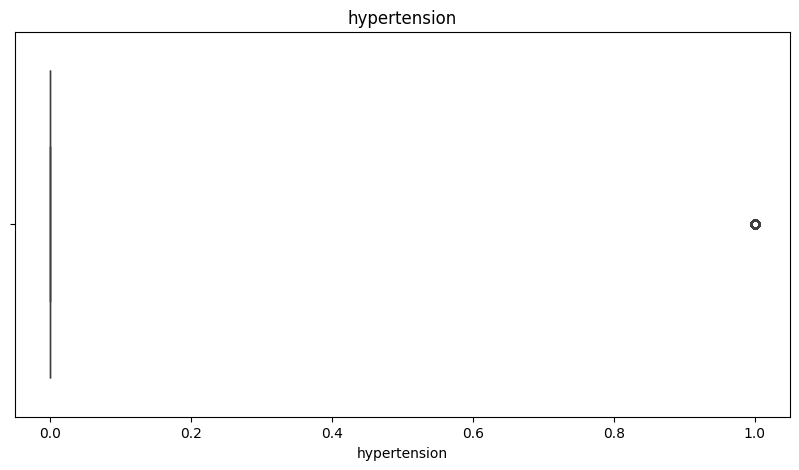

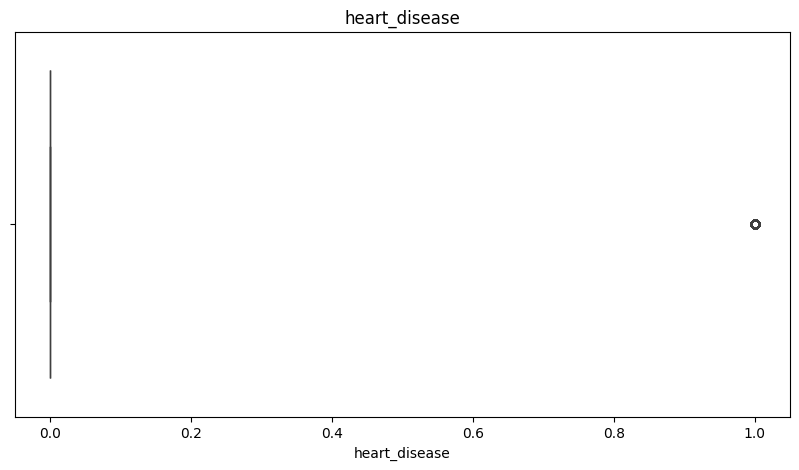

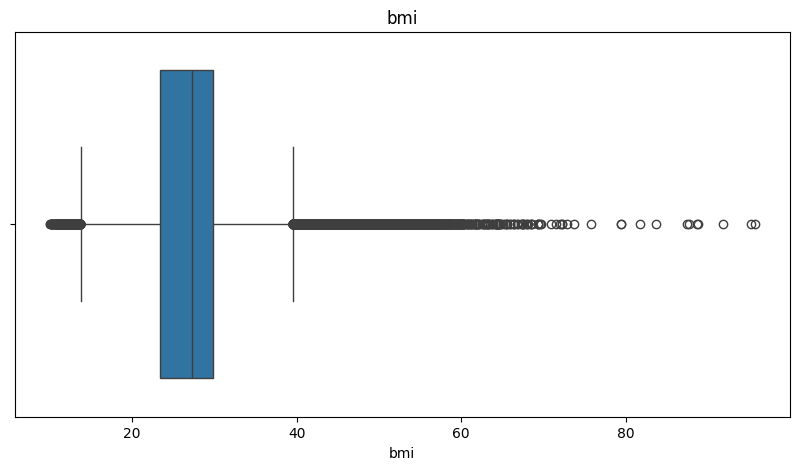

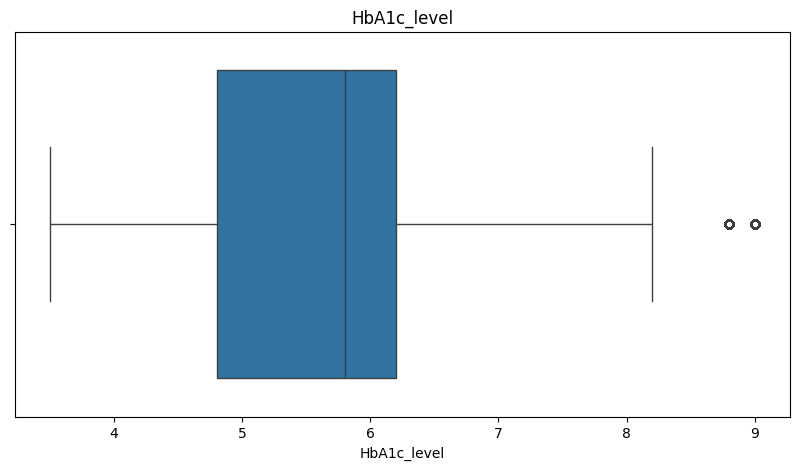

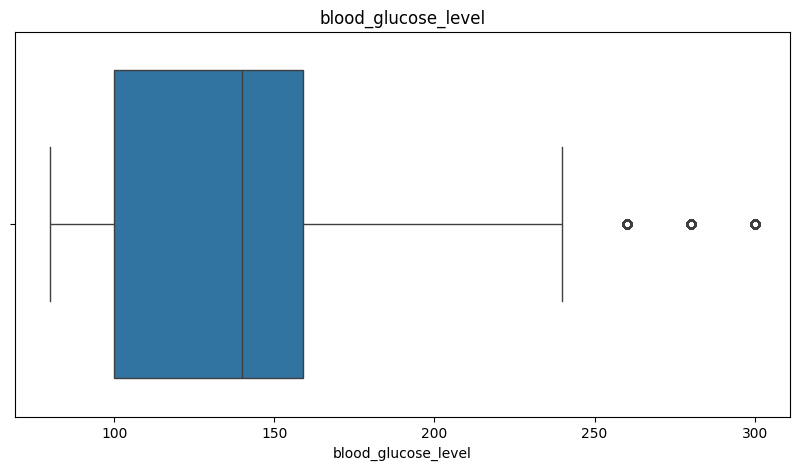

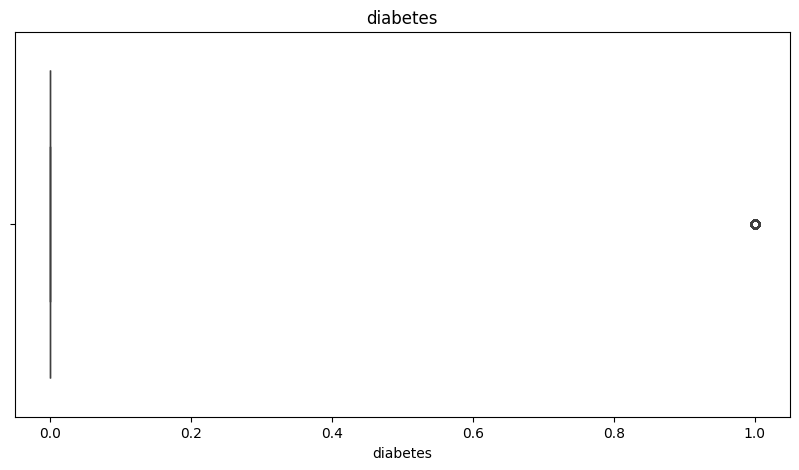

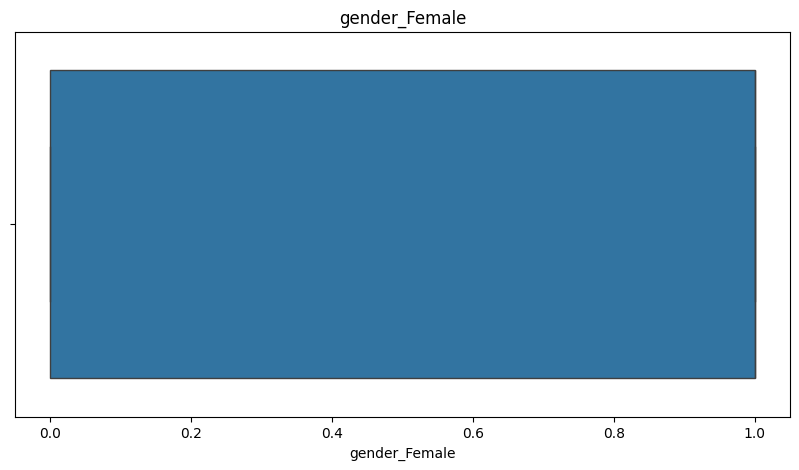

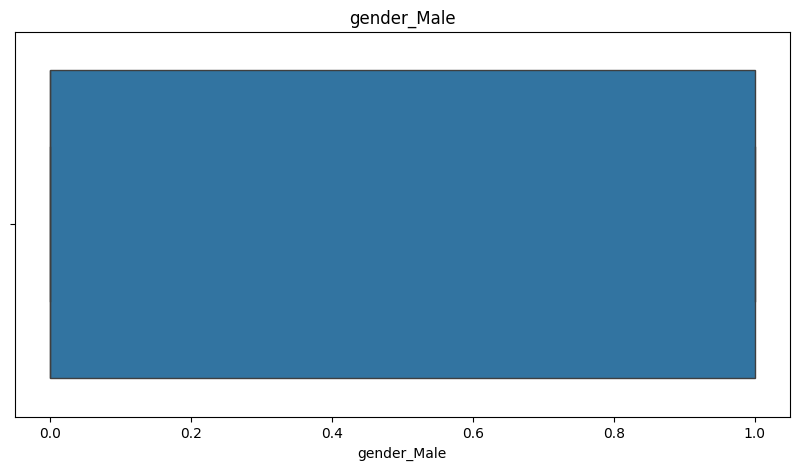

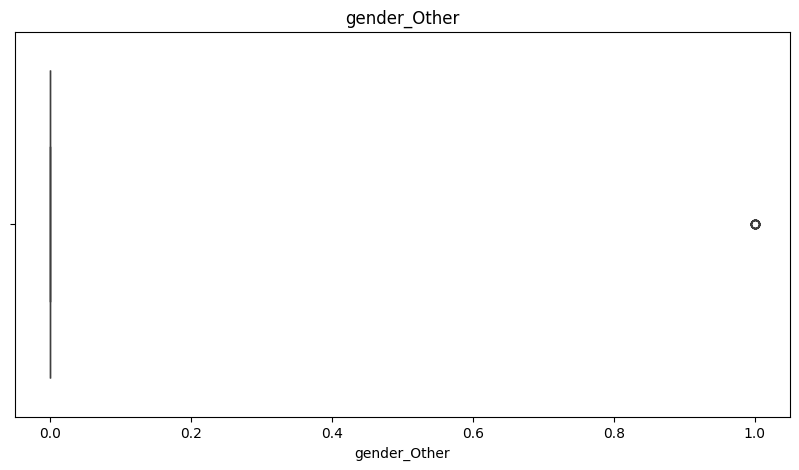

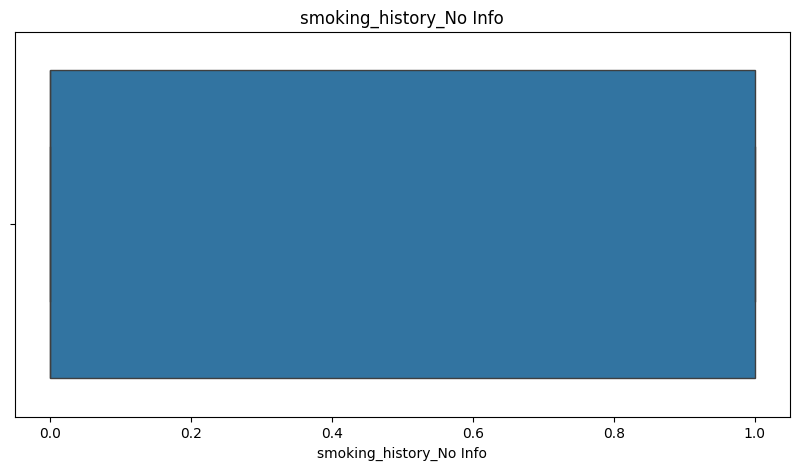

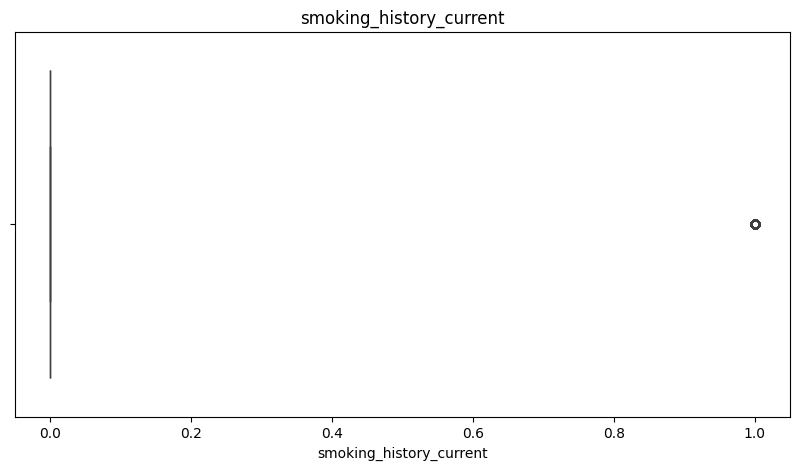

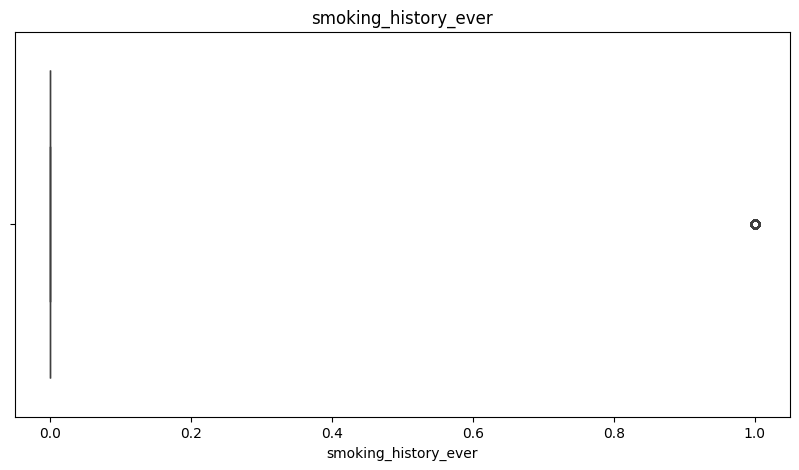

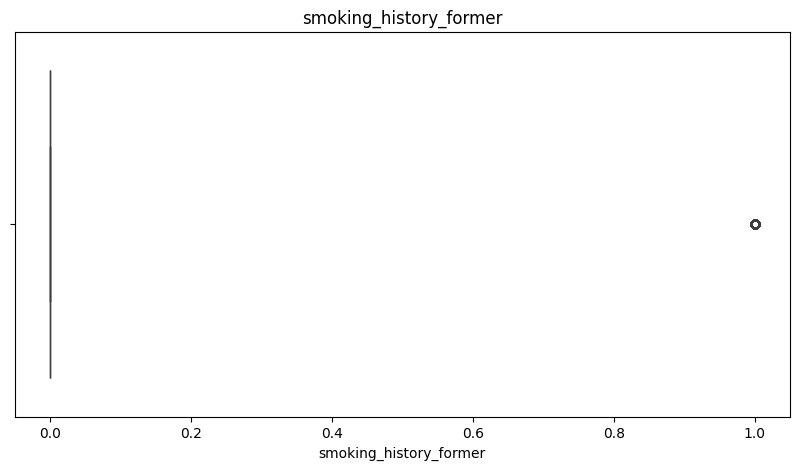

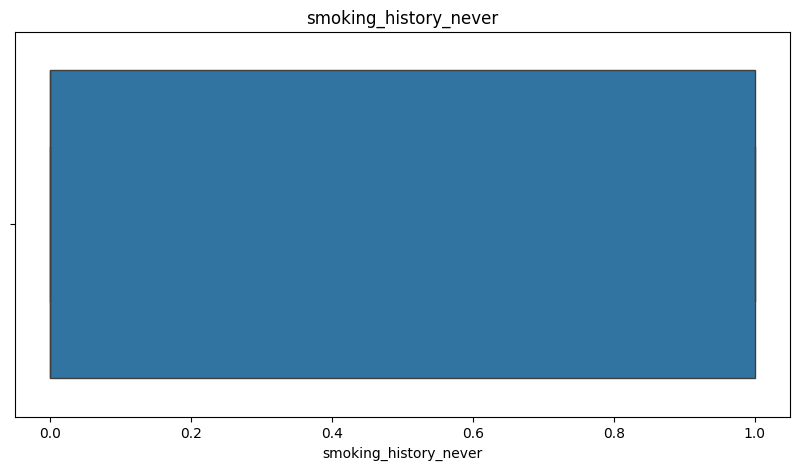

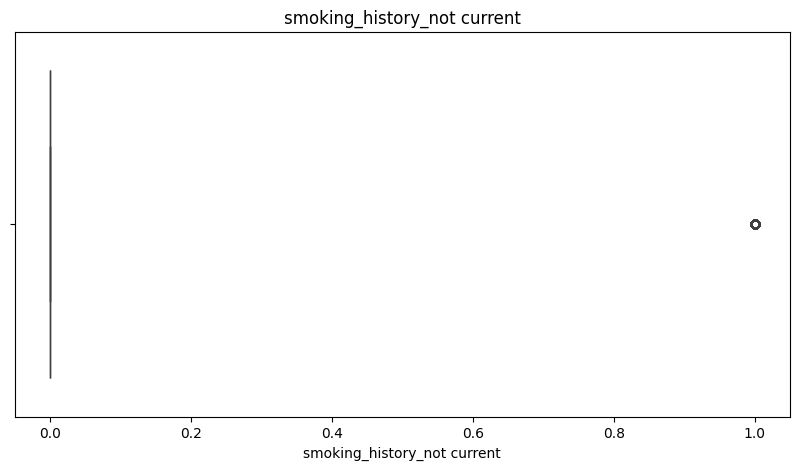

In [231]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [232]:
def detect_outliers(data):
    outliers_count ={}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)]
        outliers_count[col] = len(outlier)
    return outliers_count

outliers_in_data = detect_outliers(df)
for column,count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")
    

Column 'age' has 0 outliers
Column 'hypertension' has 7461 outliers
Column 'heart_disease' has 3923 outliers
Column 'bmi' has 5354 outliers
Column 'HbA1c_level' has 1312 outliers
Column 'blood_glucose_level' has 2031 outliers
Column 'diabetes' has 8482 outliers
Column 'gender_Female' has 0 outliers
Column 'gender_Male' has 0 outliers
Column 'gender_Other' has 18 outliers
Column 'smoking_history_No Info' has 0 outliers
Column 'smoking_history_current' has 9197 outliers
Column 'smoking_history_ever' has 3998 outliers
Column 'smoking_history_former' has 9299 outliers
Column 'smoking_history_never' has 0 outliers
Column 'smoking_history_not current' has 6367 outliers


In [233]:
def clip_outliers(data):
    df_clipped = data.copy()
    for col in df.columns:
        if col == 'diabetes':
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clipped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clipped

df_after_clip = clip_outliers(df)
print(df_after_clip)


        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              0  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             0              0  20.14          4.8   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                    140.0         0              1            0   
1                     80.0         0              1            0   
2                    158.0 

In [234]:
outliers_in_data = detect_outliers(df_after_clip)
for column, count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")

Column 'age' has 0 outliers
Column 'hypertension' has 0 outliers
Column 'heart_disease' has 0 outliers
Column 'bmi' has 0 outliers
Column 'HbA1c_level' has 0 outliers
Column 'blood_glucose_level' has 0 outliers
Column 'diabetes' has 8482 outliers
Column 'gender_Female' has 0 outliers
Column 'gender_Male' has 0 outliers
Column 'gender_Other' has 0 outliers
Column 'smoking_history_No Info' has 0 outliers
Column 'smoking_history_current' has 0 outliers
Column 'smoking_history_ever' has 0 outliers
Column 'smoking_history_former' has 0 outliers
Column 'smoking_history_never' has 0 outliers
Column 'smoking_history_not current' has 0 outliers


In [251]:
#X = df_after_clip.drop('diabetes',axis=1)
#y = df_after_clip['diabetes']

X = df.drop('diabetes',axis=1)
y = df['diabetes']


In [252]:
print(df['diabetes'].value_counts())

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [253]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)
print('Class distribution before smote:',y.value_counts())
print('Class distribution after smote:',y_resampled.value_counts())


Class distribution before smote: diabetes
0    87664
1     8482
Name: count, dtype: int64
Class distribution after smote: diabetes
0    87664
1    87664
Name: count, dtype: int64


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [255]:
scaler = StandardScaler()
X_train_normalize = scaler.fit_transform(X_train)
X_test_normalize = scaler.transform(X_test)

In [256]:
model = LogisticRegression()
model.fit(X_train_normalize, y_train)

LogisticRegression()

In [257]:
y_pred = model.predict(X_test_normalize)
accuracy = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     17439
           1       0.95      0.92      0.94     17627

    accuracy                           0.94     35066
   macro avg       0.94      0.94      0.94     35066
weighted avg       0.94      0.94      0.94     35066

[[16664   775]
 [ 1323 16304]]
AUC: 0.988481307280908


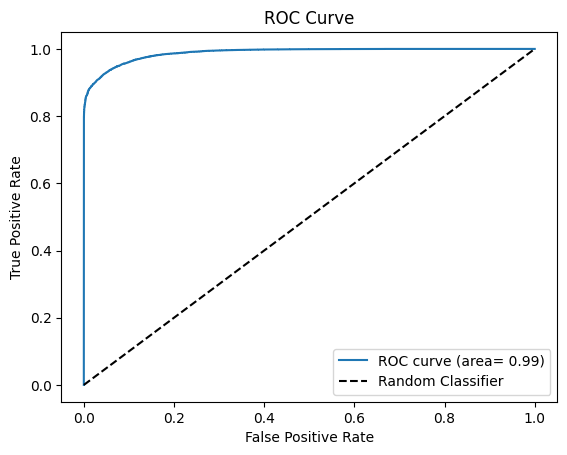

In [261]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

y_pred_proba = model.predict_proba(X_test_normalize)[:,1]
roc_auc = roc_auc_score(y_test,y_pred_proba)
print(f"AUC: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label = f'ROC curve (area= {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()